### Construction of Dataset of Rumours ###

In [0]:
# autor : steve
# email: sataucuri@ufscar.br

import os
import json
import pandas as pd

# downloading files
!wget https://github.com/stonescenter/public_data/raw/master/text/PHEME_veracity.tar.bz2

!tar -xf PHEME_veracity.tar.bz2


In [7]:
# reading all data from directories
PATH_FILES = 'all-rnr-annotated-threads/'

dirs = [directory for directory in os.listdir(PATH_FILES)]
dirs = [d for d in dirs if not d.startswith('.')]
for d in dirs:
    print(d)

dirs = [os.path.join(PATH_FILES, d) for index, d in enumerate(dirs)]
dirs = [os.path.join(d, 'rumours') for index, d in enumerate(dirs)]
for d in dirs:
    print(d)
    
subdirs = []
for d in dirs:
    sub = os.listdir(d)
    for s in sub:
        if not s.startswith('.'):
            subdirs.append(os.path.join(d,s))

json_files = [os.path.join(d, 'annotation.json') for index, d in enumerate(subdirs)]


for j in json_files:
    print(j)


germanwings-crash-all-rnr-threads
ferguson-all-rnr-threads
putinmissing-all-rnr-threads
gurlitt-all-rnr-threads
ebola-essien-all-rnr-threads
prince-toronto-all-rnr-threads
charliehebdo-all-rnr-threads
sydneysiege-all-rnr-threads
ottawashooting-all-rnr-threads
all-rnr-annotated-threads/germanwings-crash-all-rnr-threads/rumours
all-rnr-annotated-threads/ferguson-all-rnr-threads/rumours
all-rnr-annotated-threads/putinmissing-all-rnr-threads/rumours
all-rnr-annotated-threads/gurlitt-all-rnr-threads/rumours
all-rnr-annotated-threads/ebola-essien-all-rnr-threads/rumours
all-rnr-annotated-threads/prince-toronto-all-rnr-threads/rumours
all-rnr-annotated-threads/charliehebdo-all-rnr-threads/rumours
all-rnr-annotated-threads/sydneysiege-all-rnr-threads/rumours
all-rnr-annotated-threads/ottawashooting-all-rnr-threads/rumours
all-rnr-annotated-threads/germanwings-crash-all-rnr-threads/rumours/580336766663540736/annotation.json
all-rnr-annotated-threads/germanwings-crash-all-rnr-threads/rumours/580

In [0]:
# build one dataset    
data = {}
data['annotations'] = []

for index, js in enumerate(json_files):
    if not os.path.exists(js):
        print('oops nao existe')
    with open(js) as json_file:
        annotation = json.load(json_file)   
        data['annotations'].append(annotation)


In [0]:
"""
Python 3 function to convert rumour annotations into True, False, Unverified
"""

def convert_annotations(annotation, string = True):
    if 'misinformation' in annotation.keys() and 'true'in annotation.keys():
        if int(annotation['misinformation'])==0 and int(annotation['true'])==0:
            if string:
                label = "unverified"
            else:
                label = 2
        elif int(annotation['misinformation'])==0 and int(annotation['true'])==1 :
            if string:
                label = "true"
            else:
                label = 1
        elif int(annotation['misinformation'])==1 and int(annotation['true'])==0 :
            if string:
                label = "false"
            else:
                label = 0
        elif int(annotation['misinformation'])==1 and int(annotation['true'])==1:
            print ("OMG! They both are 1!")
            print(annotation['misinformation'])
            print(annotation['true'])
            label = None
            
    elif 'misinformation' in annotation.keys() and 'true' not in annotation.keys():
        # all instances have misinfo label but don't have true label
        if int(annotation['misinformation'])==0:
            if string:
                label = "unverified"
            else:
                label = 2
        elif int(annotation['misinformation'])==1:
            if string:
                label = "false"
            else:
                label = 0
                
    elif 'true' in annotation.keys() and 'misinformation' not in annotation.keys():
        print ('Has true not misinformation')
        label = None
    else:
        print('No annotations')
        label = None
           
    return label


In [12]:
annotations = data['annotations']

i = 0
#data = {}
#data['rumours'] = []
lst = []
for anno in annotations:
    label = convert_annotations(anno)

    # somente consideramos true e false
    if not label == 'unverified':
        rumour = {}
        rumour['text'] = anno['category']
        rumour['is_fake'] =  1 if label == 'true' else 0
        lst.append(rumour)
    
df = pd.DataFrame(lst,  columns= ['text', 'is_fake'])

df.head()

# não deveria sair repetido nao sei porque acontece isso
# pode ser que os dados estem realmente repetidos

,text,is_fake
0,There were 148 people onboard the Germanwings ...,0
1,A Germanwings airplane has crashed in the Fren...,1
2,The co-pilot was a convert to Islam,0
3,There are no survivors in Germanwings crash,1
4,The co-pilot was a convert to Islam,0


In [13]:
df.describe()

,is_fake
count,1705.000000
mean,0.625806
std,0.484056
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


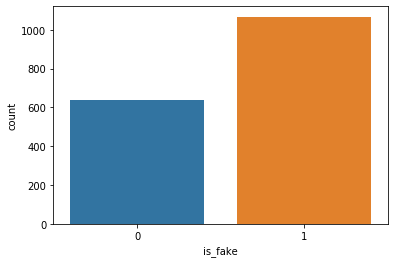

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# show ours classes, are they balanced?
f, ax = plt.subplots(figsize=(6, 4))
sns.countplot(df['is_fake'])

In [0]:
# save annotation in a easy format .json not a directories
saved_path = 'rumours_dataset.json'

try:
	if not os.path.exists(saved_path):
		open(saved_path, 'w').close()

	with open(saved_path, 'w+') as outfile:
		json.dump(lst, outfile, indent=4)
except Exception as e: print(e)
   